# Deep Learning Indonesia.AI
Pertemuan - 4 Feedforward Propogation (Assignment - 1)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import layers
from keras.models import Sequential

plt.style.use('ggplot')

# Load Datasets

## Datasets Information (Heart Disease Data Set)
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

### Attribute documentation

No | Name | Description
:---:|---|---
1 | age | age in years
2 | sex | sex (1 = male; 0 = female)
3 | cp | chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 3 = asymptomatic)
4 | trestbps | resting blood pressure (in mm Hg on admission to the hospital)
5 | chol | serum cholestoral in mg/dl
6 | fbs | (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7 | restecg | resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8 | thalach | maximum heart rate achieved
9 | exang | exercise induced angina (1 = yes; 0 = no)
10 | oldpeak |  ST depression induced by exercise relative to rest
11 | slope | the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
12 | ca | number of major vessels (0-3) colored by flourosopy
13 | thal | 3 = normal; 6 = fixed defect; 7 = reversable defect
14 |target | the predicted attribute

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')
df.shape

(302, 14)

In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps',
        'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca',
        'thal', 'target']

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


# Exploratory Data Analysis

In [5]:
print(f'Total data : {df.shape[0]}')
print(f'Total attribute : {df.shape[1]}')

Total data : 302
Total attribute : 14


## Check Information data

### Description data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.410596,9.040163,29.0,48.00,55.5,61.0,77.0
sex,302.0,0.678808,0.467709,0.0,0.00,1.0,1.0,1.0
cp,302.0,3.165563,0.953612,1.0,3.00,3.0,4.0,4.0
trestbps,302.0,131.645695,17.612202,94.0,120.00,130.0,140.0,200.0
chol,302.0,246.738411,51.856829,126.0,211.00,241.5,275.0,564.0
fbs,302.0,0.145695,0.353386,0.0,0.00,0.0,0.0,1.0
restecg,302.0,0.986755,0.994916,0.0,0.00,0.5,2.0,2.0
thalach,302.0,149.605960,22.912959,71.0,133.25,153.0,166.0,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.0,1.0
oldpeak,302.0,1.035430,1.160723,0.0,0.00,0.8,1.6,6.2


### Missing Value

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Check Unique value

In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        5
dtype: int64

## Visualization data

### Univariate Analysis

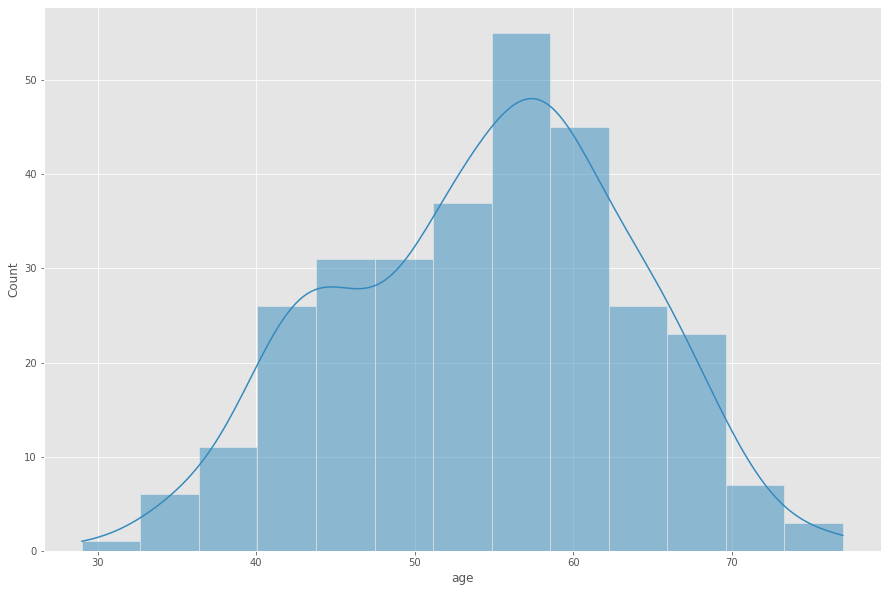

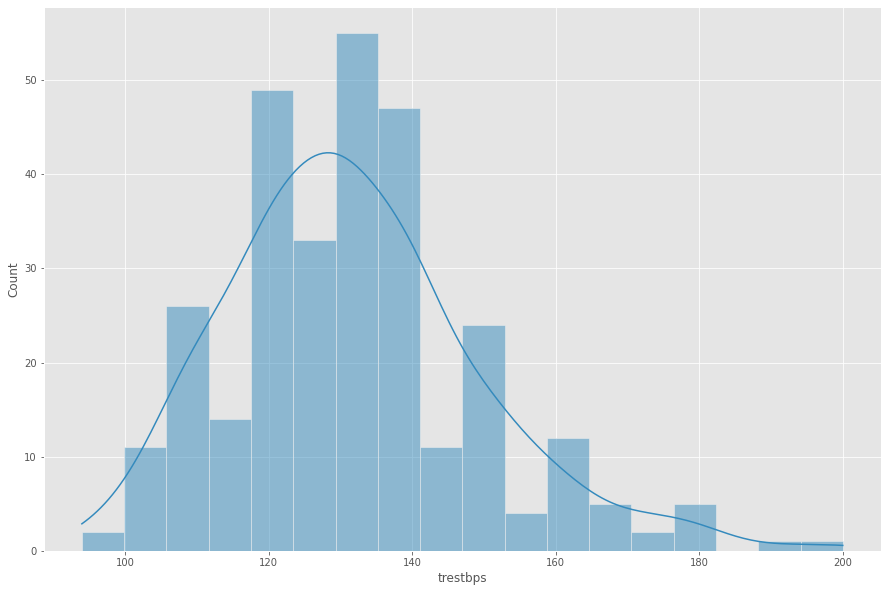

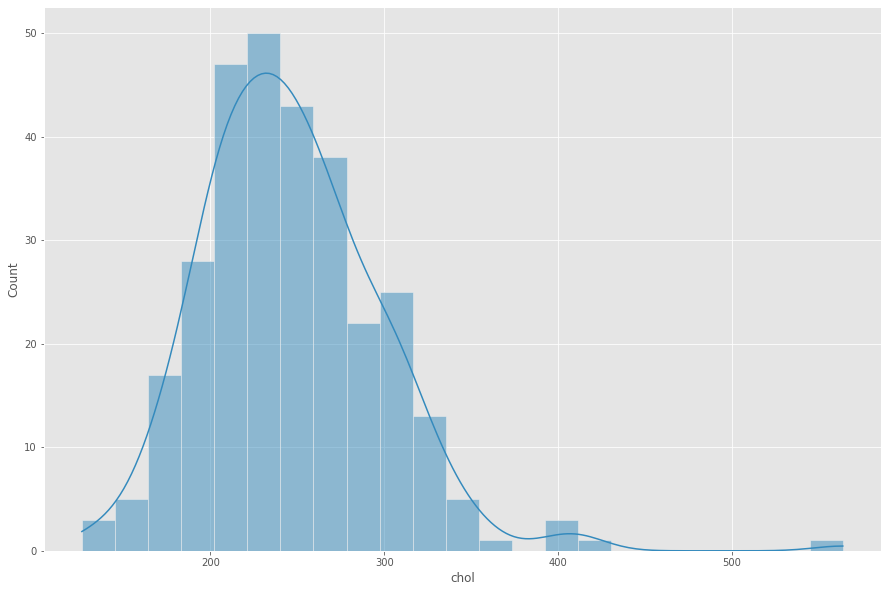

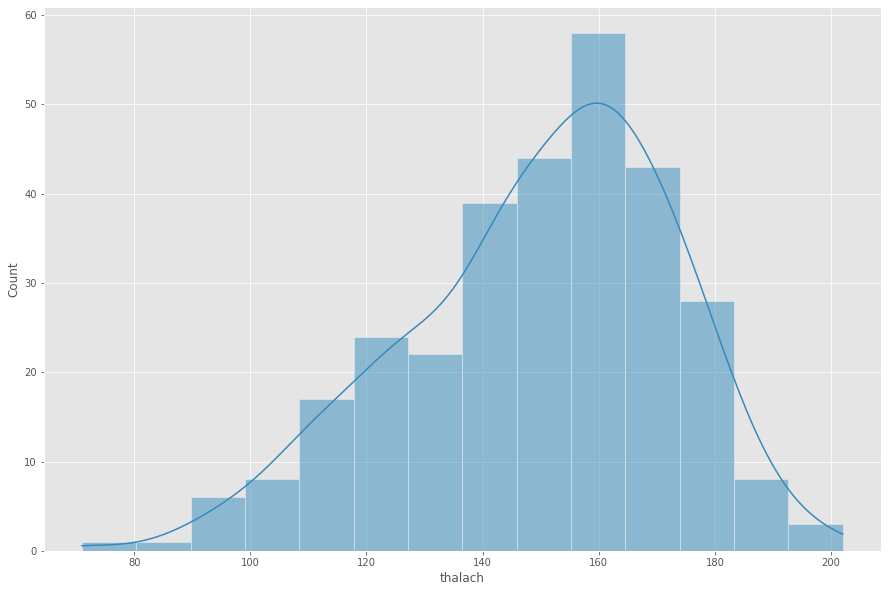

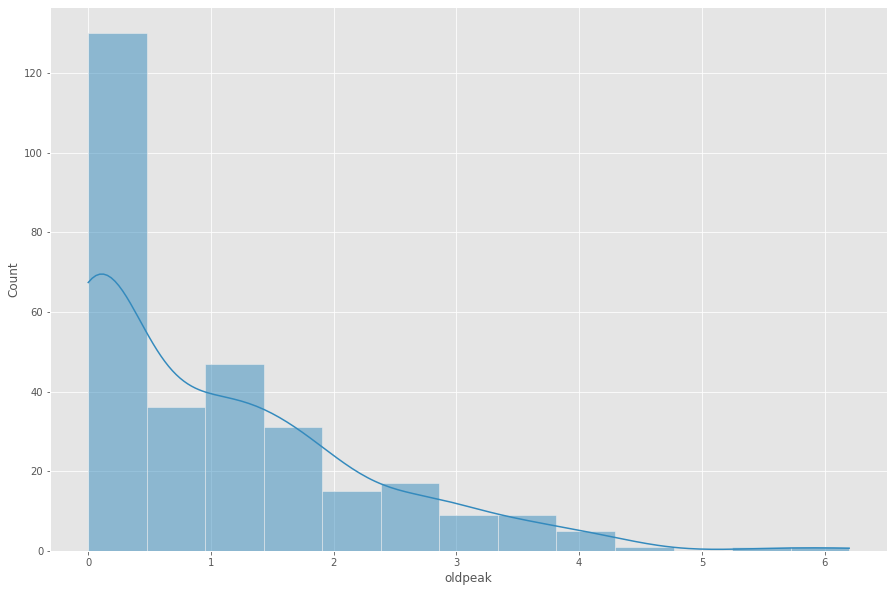

In [9]:
# Distribute data
dist_univariate_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for column in dist_univariate_columns:
    plt.figure(figsize=(15,10))
    sns.histplot(data=df, x=column,kde=True)
    plt.show()

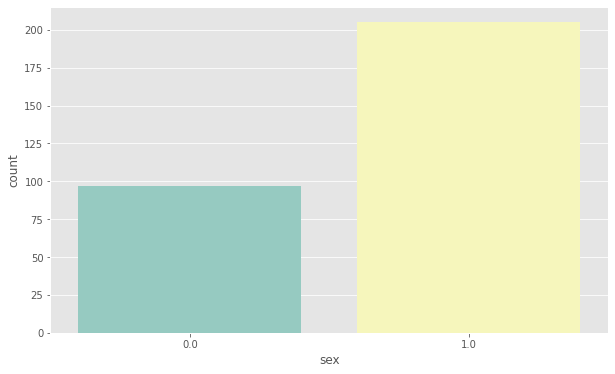

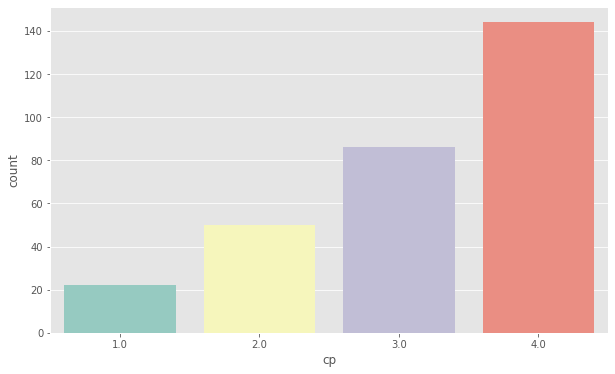

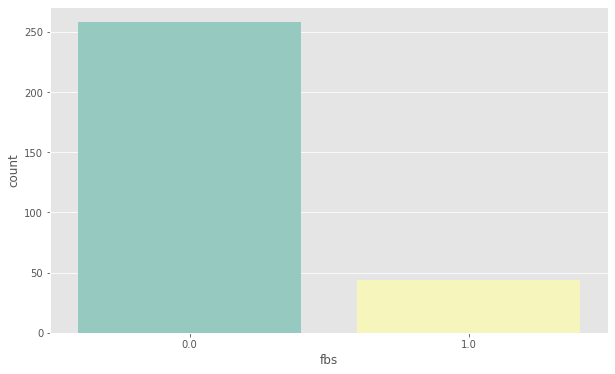

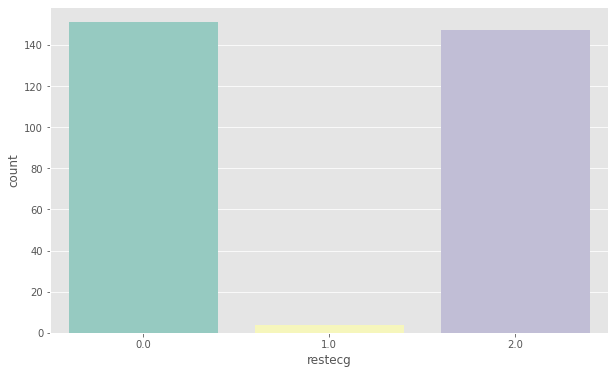

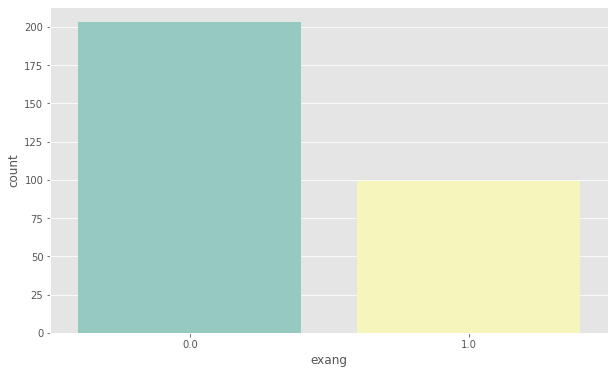

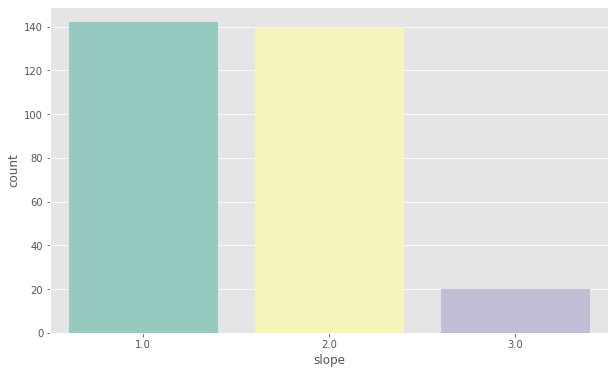

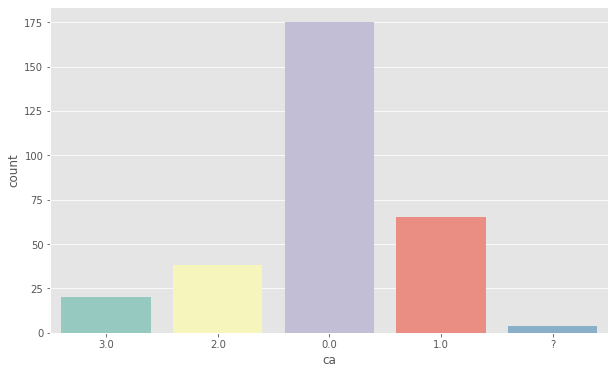

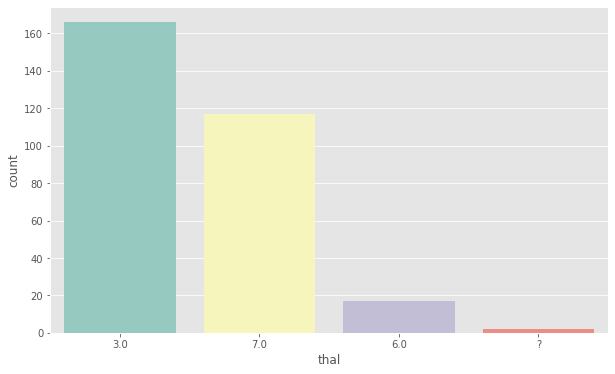

In [10]:
univariate_columns = df.drop(['target','age', 'trestbps', 'chol', 'thalach', 'oldpeak'],axis=1)

for column in univariate_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, palette='Set3')
plt.show()

### Multivariate Analysis

#### by Label

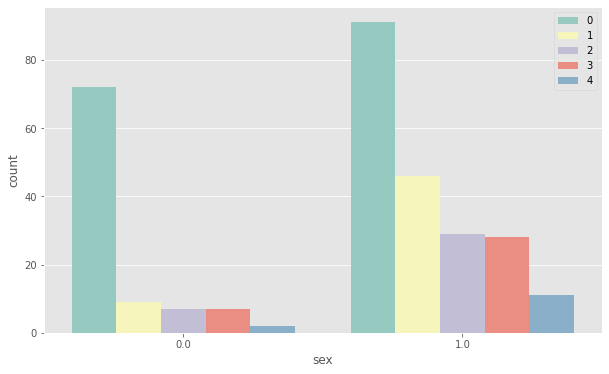

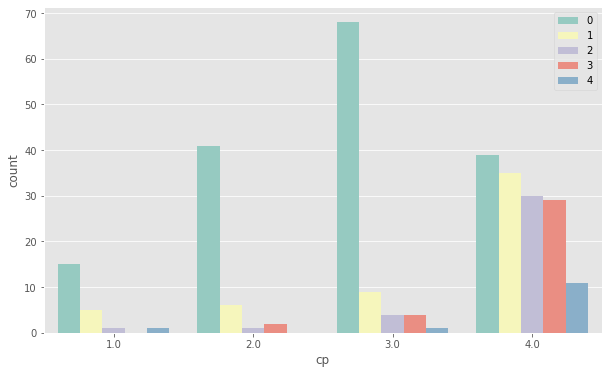

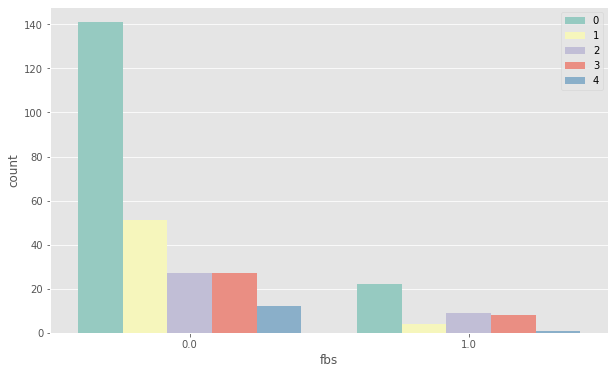

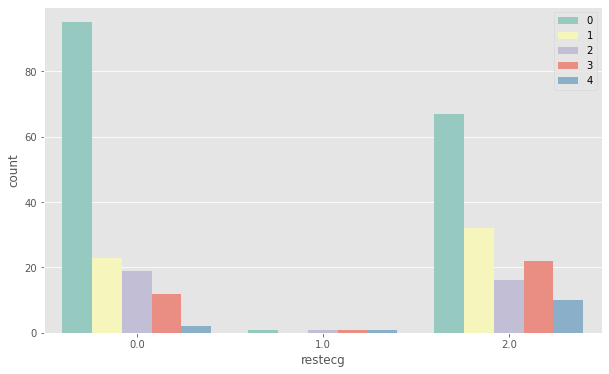

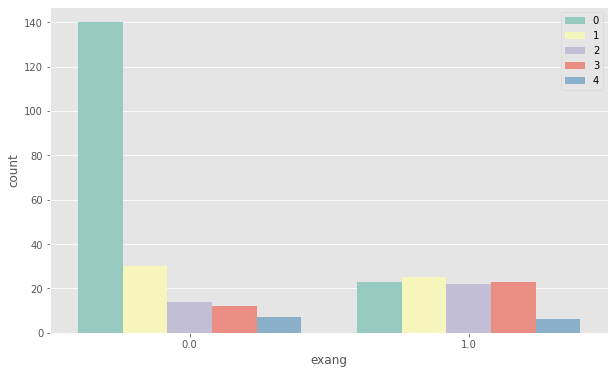

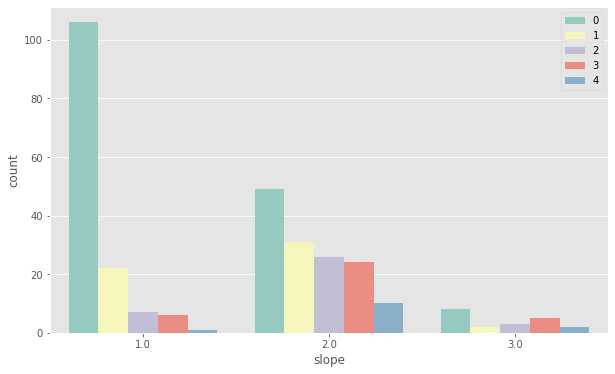

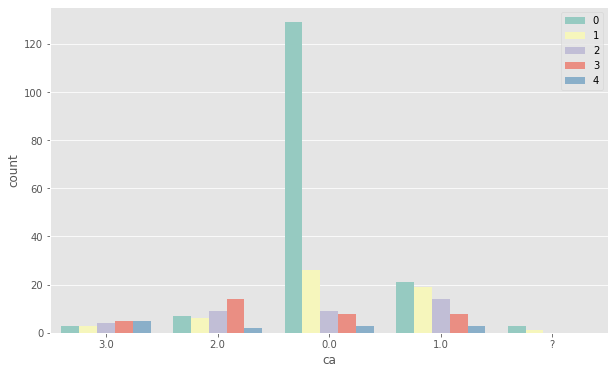

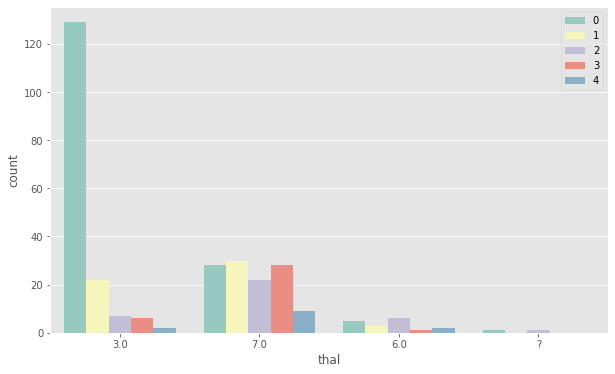

In [11]:
multivariate_columns = df.drop(['target','age', 'trestbps', 'chol', 'thalach', 'oldpeak'],axis=1)

for column in multivariate_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, palette='Set3', hue='target')
    plt.legend(loc=1)
    plt.show()

#### by Gender

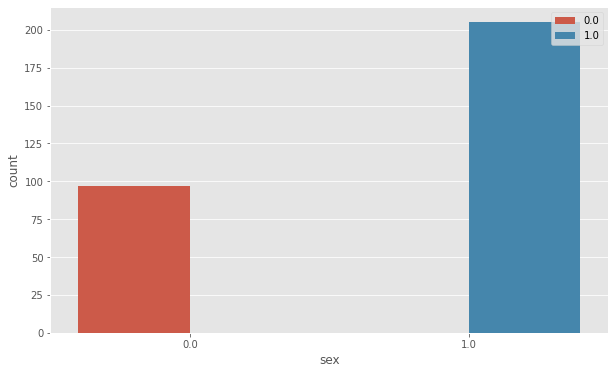

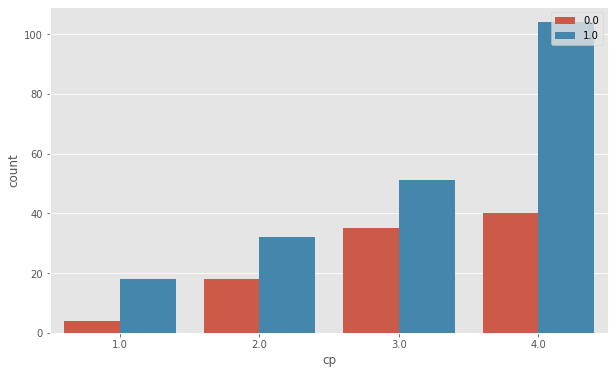

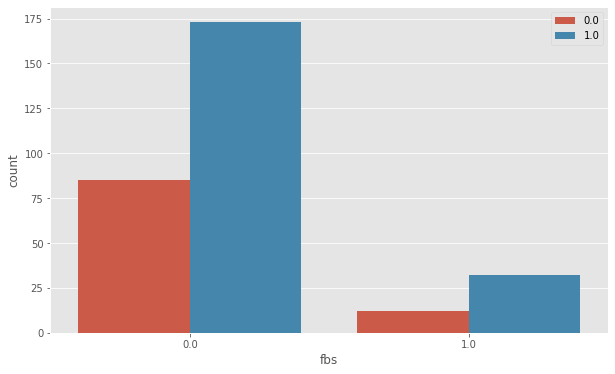

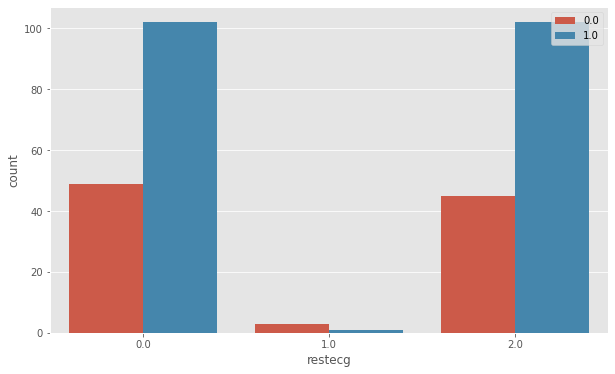

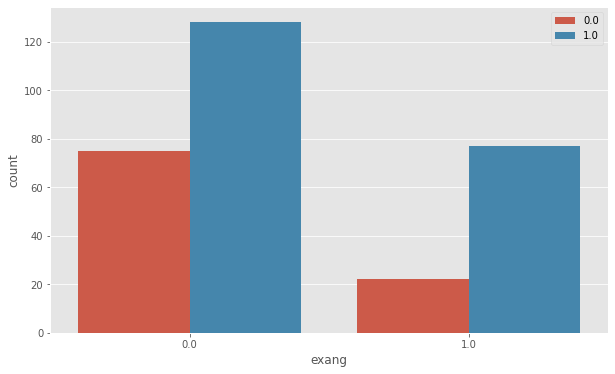

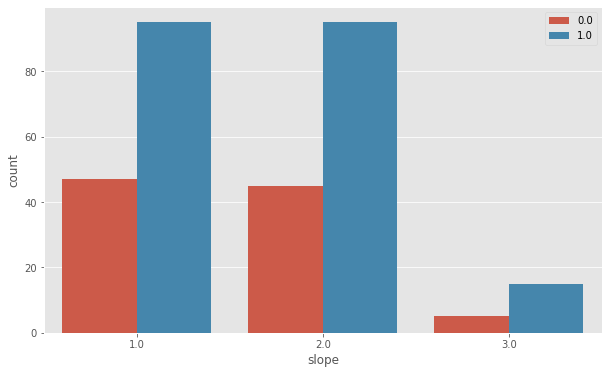

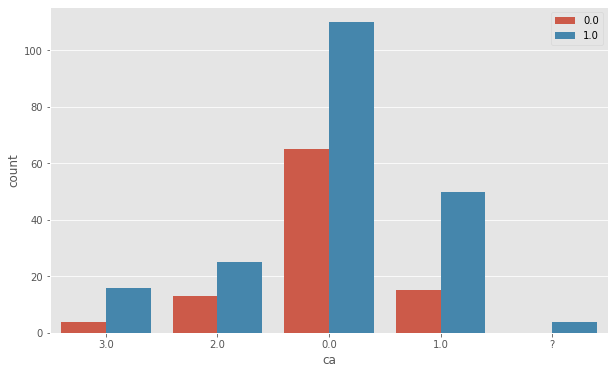

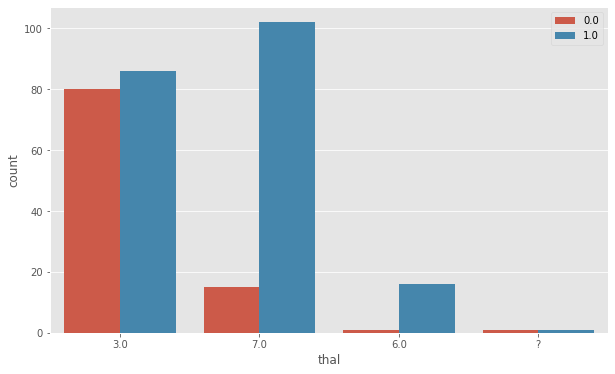

In [12]:
multivariate_columns = df.drop(['target','age', 'trestbps', 'chol', 'thalach', 'oldpeak'],axis=1)

for column in multivariate_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column, hue='sex')
    plt.legend(loc=1)
    plt.show()

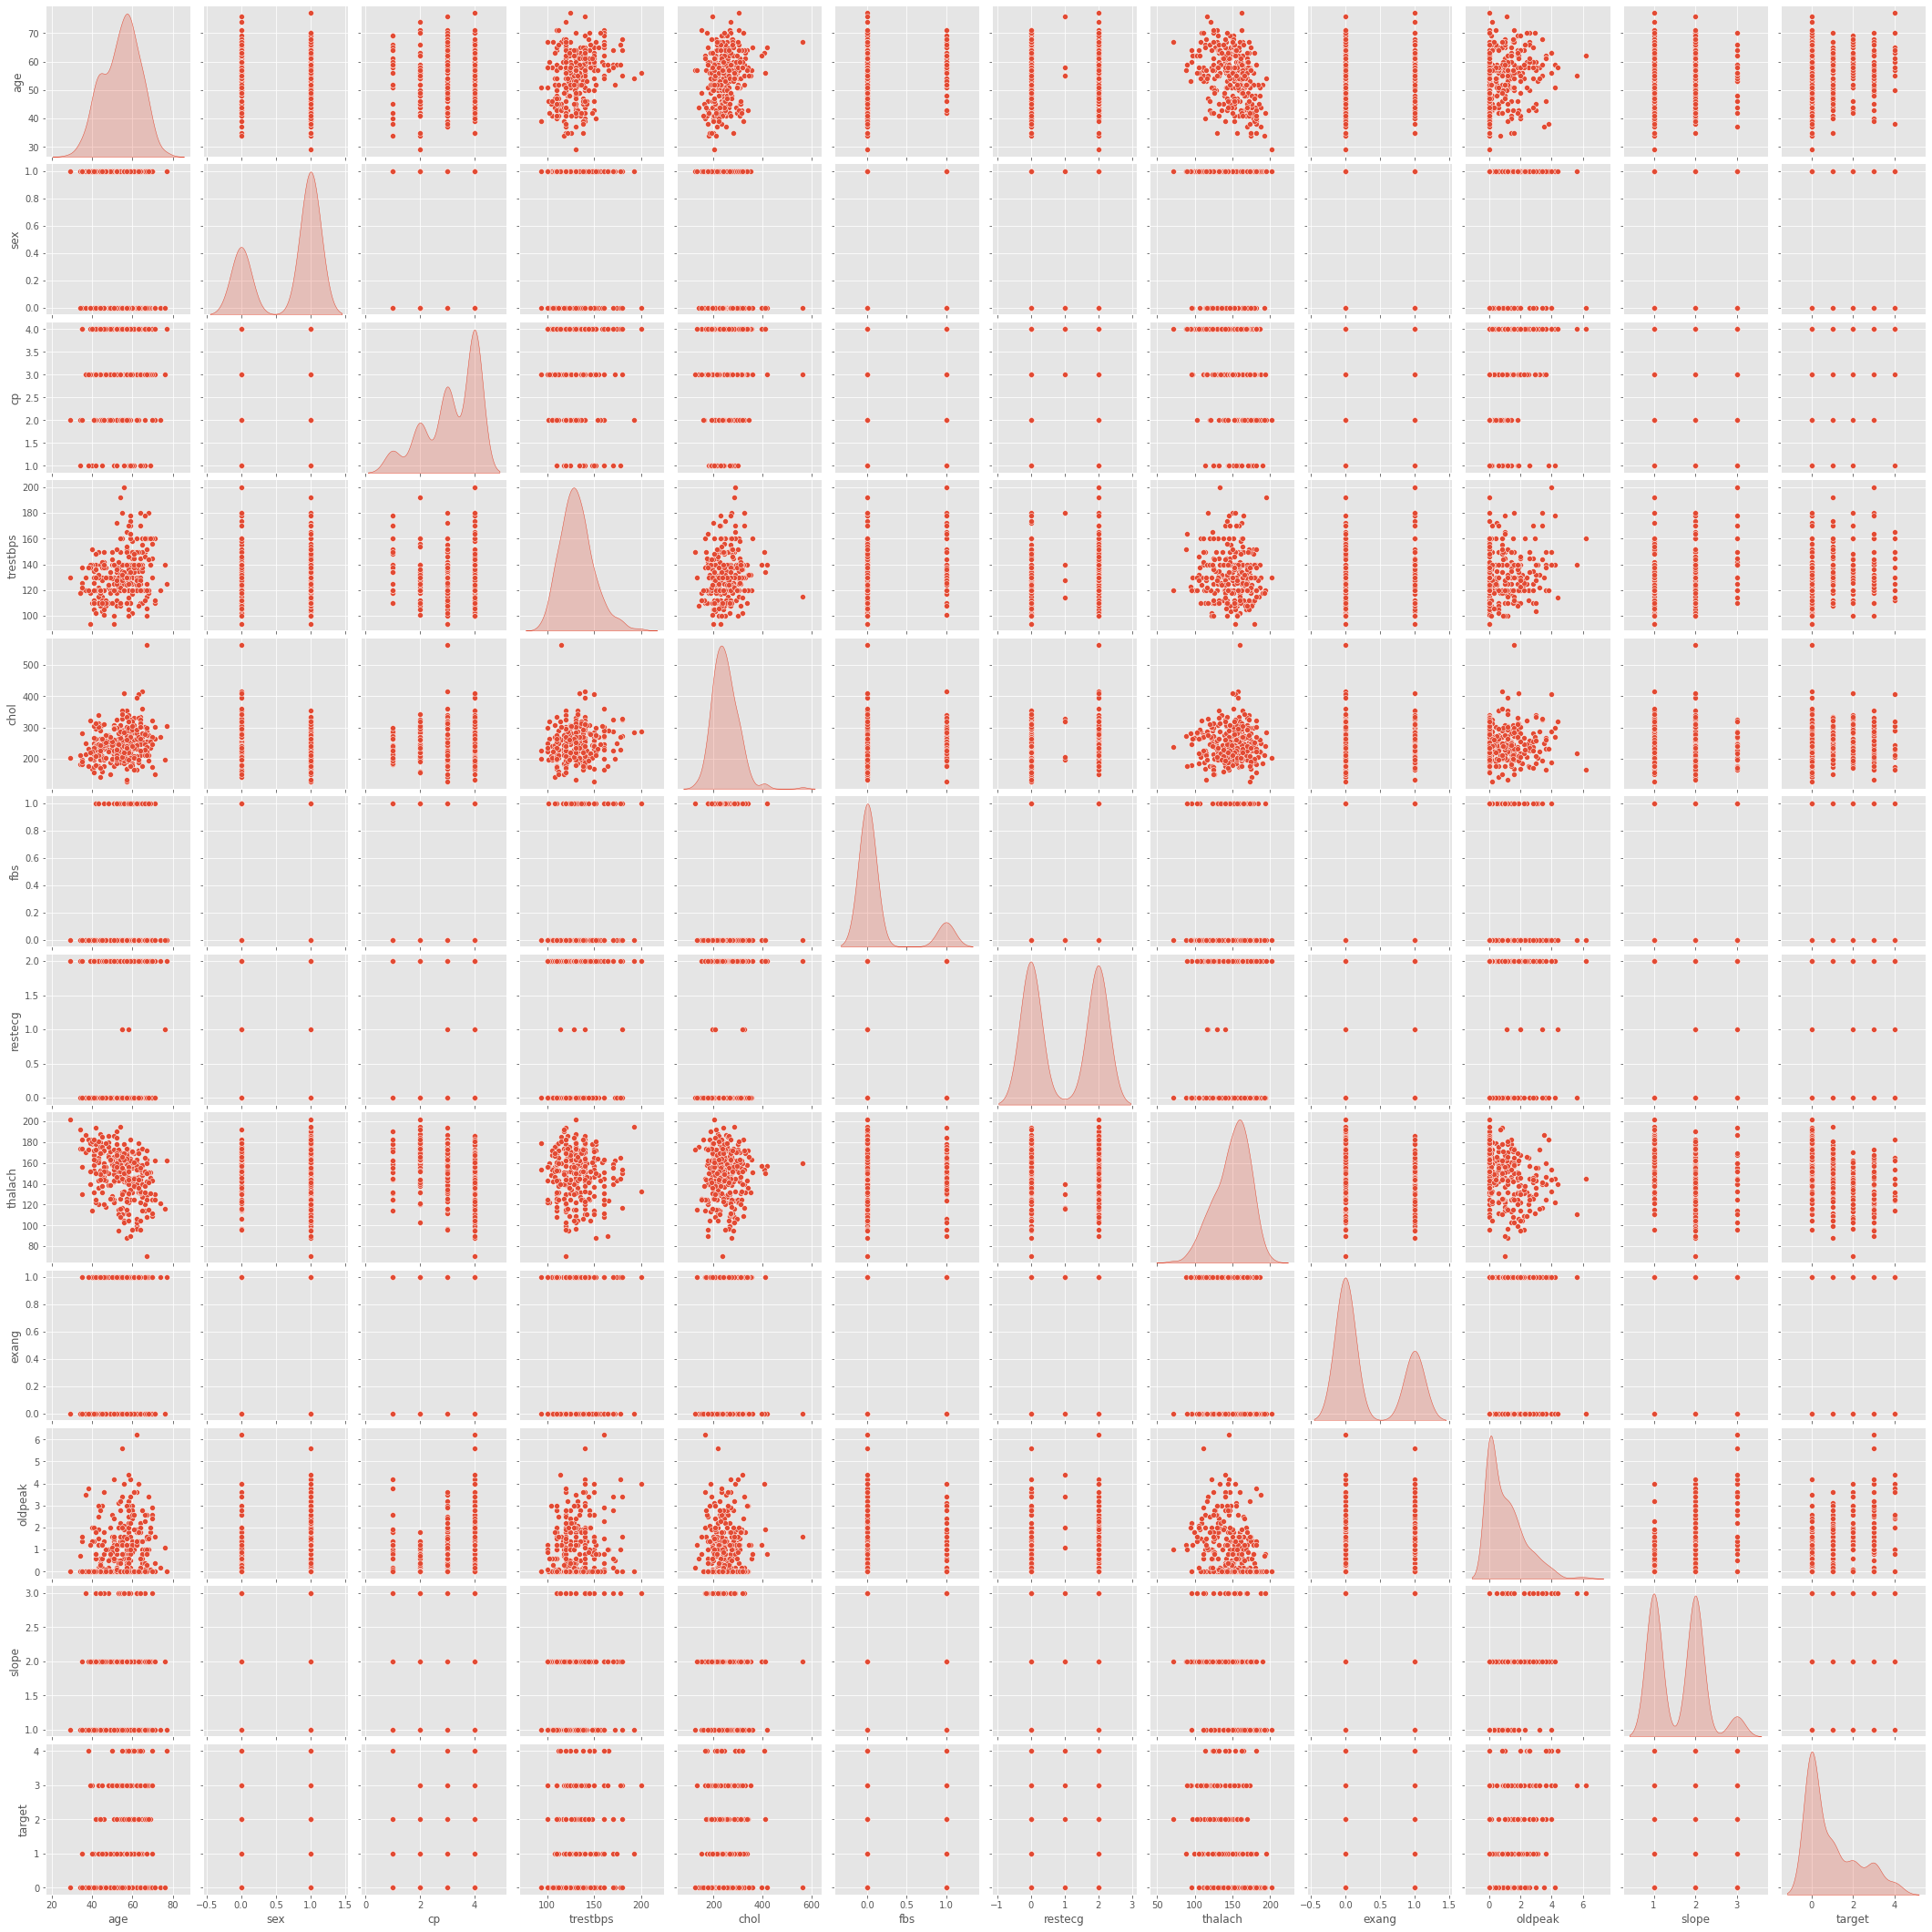

In [13]:
sns.pairplot(data=df, diag_kind='kde')
plt.show()

## Label Visualization

In [14]:
targets = df.target.value_counts()

print('---Value Target---')
print(f'Total data : {targets.sum()}')

print('\nList Data')
for i in range(len(targets)):
    print(f'Value {i} : {df.target.value_counts()[i]}')

---Value Target---
Total data : 302

List Data
Value 0 : 163
Value 1 : 55
Value 2 : 36
Value 3 : 35
Value 4 : 13


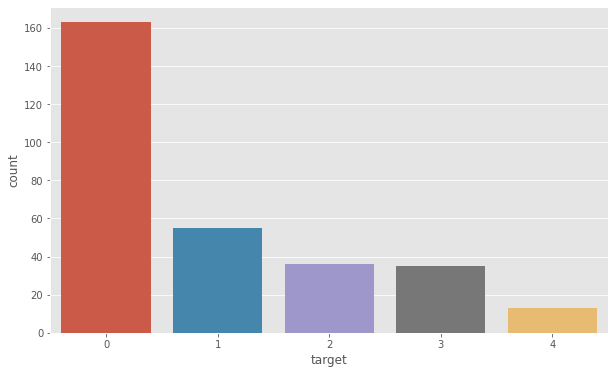

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='target')
plt.show()

# Data Preparation

## Delete Symbol value

In [16]:
# change symbol value into Nan
df = df[df != '?']
df.dropna(axis=0, inplace=True)

In [17]:
df.shape

(296, 14)

## Change type data 

In [18]:
df_column = {'ca' : float,
            'thal' : float}

df = df.astype(df_column)

## Feature Selection

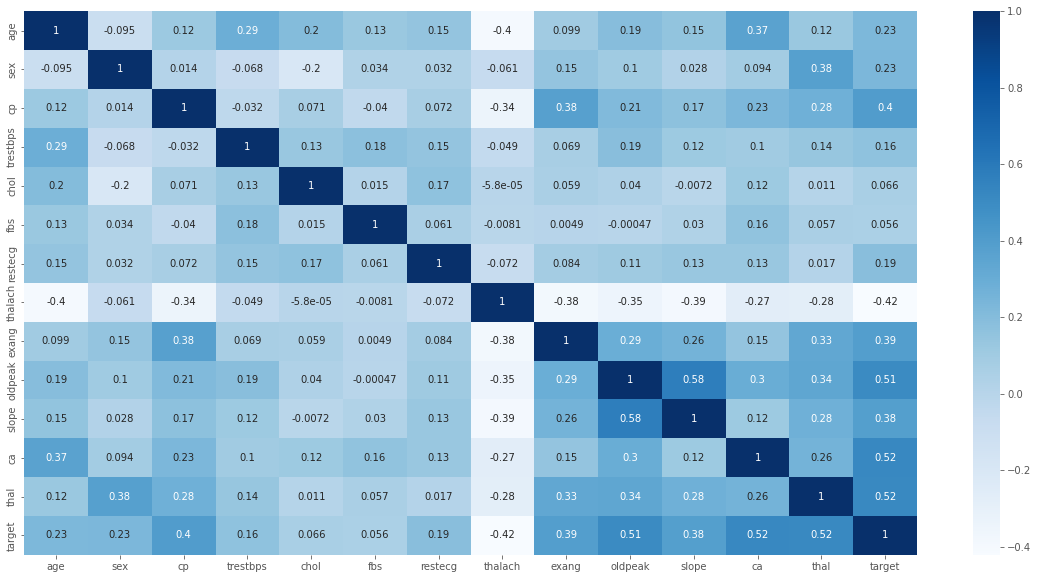

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues')
plt.show()

In [20]:
feature = df.drop('target', axis=1)
label = df['target']

In [21]:
corr = df.corr()

feature_corr = abs(df.corr()['target']).sort_values(ascending=False)
feature_corr

target      1.000000
ca          0.520282
thal        0.515967
oldpeak     0.505713
thalach     0.421013
cp          0.402260
exang       0.390516
slope       0.384283
sex         0.229002
age         0.225141
restecg     0.187266
trestbps    0.161882
chol        0.065805
fbs         0.055959
Name: target, dtype: float64

In [22]:
feature = feature.drop(['fbs', 'chol', 'trestbps', 'restecg'], axis=1)

## Split data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=2)

In [24]:
print(f'Total Training feature data : {X_train.shape[0]}')
print(f'Total Training label data : {y_train.shape[0]}')

Total Training feature data : 236
Total Training label data : 236


# Train Model

## Experiment with Epoch

In [25]:
def fit_first_model(x_train, y_train, x_test, y_test, epoch):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=9, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    # fit model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(epoch))
    plt.legend()

In [26]:
epoch = [50, 100, 150, 200, 250, 300, 350, 400]

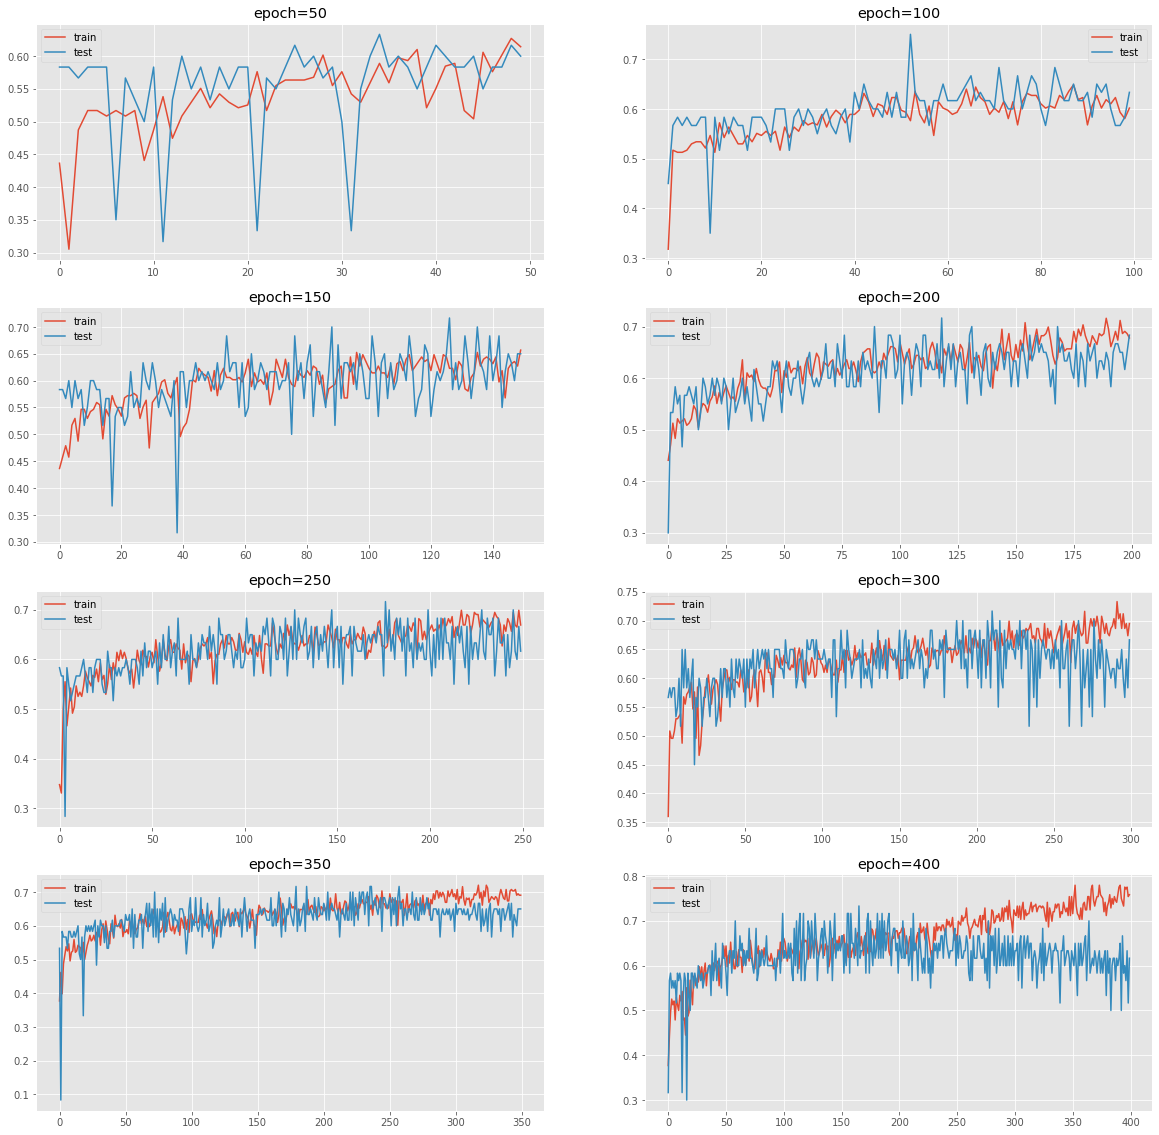

In [27]:
plt.figure(figsize=(20, 20))
for i in range(len(epoch)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, epoch[i])

# show learning curves
plt.show()

### Conclusion 
Dari grafik dapat disimpulkan bahwa :
1. semakin besar epoch tidak membuat model menjadi lebih baik, terlihat pada rentang epoch 300-400 bahwa `spike` semakin banyak dan bahkan jarak antara akurasi train dan test semakin jauh berbeda. ini bisa sebagai indikasi bahwa model overfitting
2. model terlihat bagus di range epoch antara 100-250 bisa dilihat bahwa perbedaan antara akurasi data train dan test tidak terlalu memiliki jarak yang berbeda
3. saya akan menggunakan epoch 200

## Experiment with Batch Size

In [28]:
def fit_first_model(x_train, y_train, x_test, y_test, batch):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=9, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    # fit model
    epoch = 200
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch_size='+str(batch))
    plt.legend()

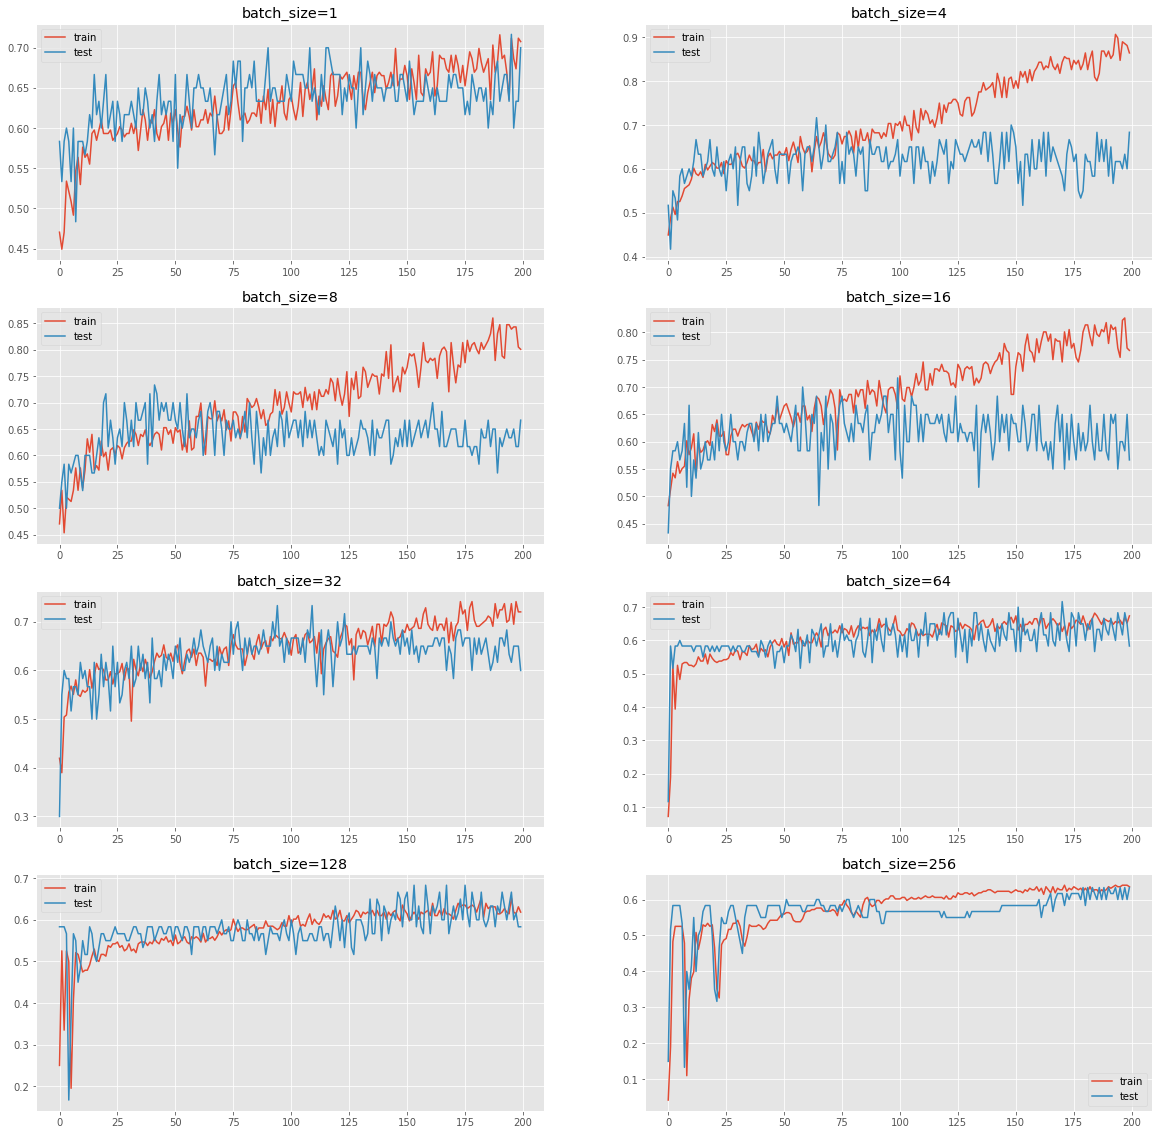

In [29]:
batchs = [1, 4, 8, 16, 32, 64, 128, 256]

plt.figure(figsize=(20, 20))
for i in range(len(batchs)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, batchs[i])

# show learning curves
plt.show()

### Conclusion
Dari grafik dapat disimpulkan bahwa :
1. Batch size 1-16 memiliki jarak akurasi yang cukup jauh antara data train dan test pada batch size ini bisa dibilang overfiting
2. Batch size 32  akurasi test nya memiliki jarak yang berbeda dengan akurasi train
3. pada Batch size 64 & 128 performa akurasi antara data train dan test hampir tidak memiliki jarak yang cukup jauh
4. saya akan menggunakan batch size 128

## Experiment with Learning Rate

In [30]:
def fit_first_model(x_train, y_train, x_test, y_test, lr):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(32, input_dim=9, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
    
    # fit model
    epoch = 200
    batch = 128
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch, batch_size=batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('learning_rate='+str(lr))
    plt.legend()

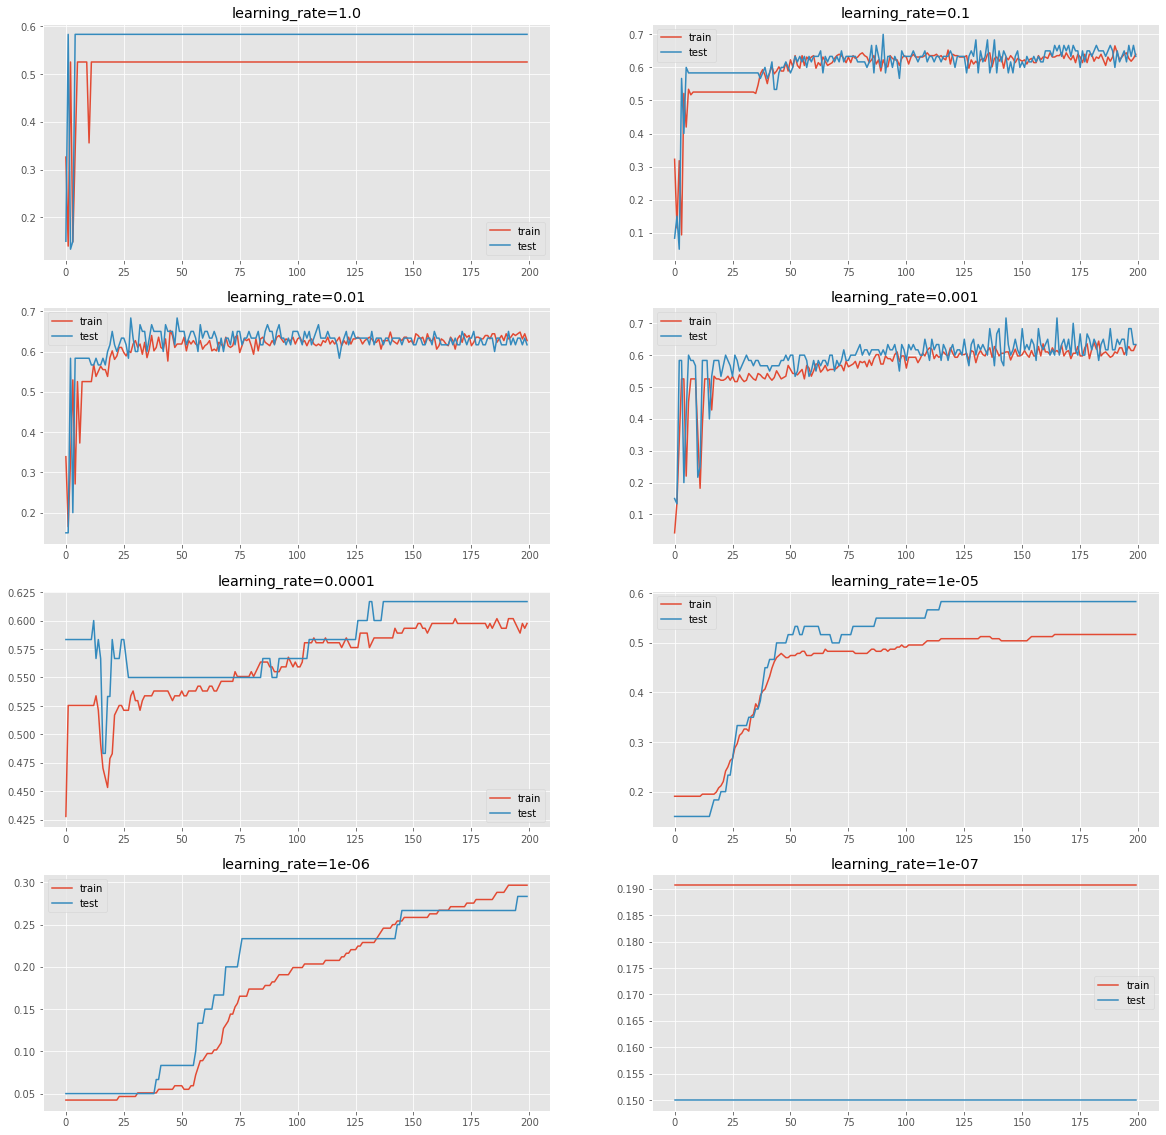

In [31]:
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

plt.figure(figsize=(20, 20))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_first_model(X_train, y_train, X_test, y_test, learning_rates[i])

# show learning curves
plt.show()

### Conclusion
Dari grafik dapat disimpulkan bahwa :
1. semakin kecil learning rate antara 0.0001 sampai terakhir membuat model memiliki jarak yang lumayan jauh antara data train dan data test
2. begitu pula learning rate 1 juga memiliki jarak yang jauh
3. learning yang optimal antara 0.01 dan 0.001
4. saya akan menggunakan learning rate 0.01

## Final Model

In [73]:
model = Sequential([
    layers.Dense(units=32, input_dim=9, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=5, activation='softmax')
])

In [74]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [75]:
epochs = 200
batchs = 128
history = model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=epochs,
  batch_size=batchs
)

Epoch 1/200
2/2 [==============================] - 1s 215ms/step - loss: 10.7764 - accuracy: 0.3432 - val_loss: 7.8800 - val_accuracy: 0.5833
Epoch 2/200
2/2 [==============================] - 0s 35ms/step - loss: 13.6819 - accuracy: 0.3390 - val_loss: 15.3060 - val_accuracy: 0.1333
Epoch 3/200
2/2 [==============================] - 0s 39ms/step - loss: 10.8551 - accuracy: 0.1144 - val_loss: 2.4804 - val_accuracy: 0.5833
Epoch 4/200
2/2 [==============================] - 0s 41ms/step - loss: 2.7114 - accuracy: 0.5254 - val_loss: 1.8105 - val_accuracy: 0.5833
Epoch 5/200
2/2 [==============================] - 0s 35ms/step - loss: 1.5961 - accuracy: 0.4958 - val_loss: 1.7075 - val_accuracy: 0.1833
Epoch 6/200
2/2 [==============================] - 0s 37ms/step - loss: 1.8026 - accuracy: 0.3517 - val_loss: 1.4990 - val_accuracy: 0.5833
Epoch 7/200
2/2 [==============================] - 0s 35ms/step - loss: 1.5037 - accuracy: 0.5042 - val_loss: 1.6828 - val_accuracy: 0.1833
Epoch 8/200
2/2

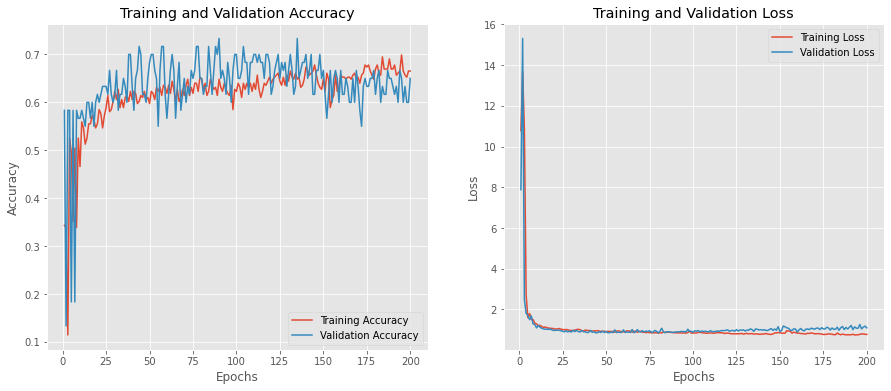

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = np.arange(1,201)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [79]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.682, Valid: 0.650
